<pre style="float: right">version 1.0.1</pre>
# FNLP: Lab Session 1: Corpora and Language Models

## Aim

The aims of this lab session are to 
1. explore the different uses of language in different documents, authored by different people and 
2. introduce the construction of language models using Python’s Natural Language Tool Kit (NLTK).

This year labs are run through Jupyter Notebooks. Successful completion of this lab is important as the first assignment for FNLP builds on some of the concepts and methods that are introduced here. By the end of this lab session, you should be able to:

* Access the corpora provided in NLTK
* Compute a frequency distribution
* Train a language model
* Use a language model to compute bigram probabilities

### Python Help 

Python contains a built-in help module that runs in an interactive mode. To
run the interactive help, type:

In [122]:
# help()

`help()` will run until interrupted. If a cell is running it will block any other cell from running until it has completed. You can check if a cell is still running by looking at `In [*]:` to the left of any cell. If there is a `*` inside the brackets the cell is still running. As soon as the cell has stopped running the `*` will be replaced by a number. 

**Before moving on** you will need to interrupt `help()` (make it stop running). To interrupt running cells go to **`kernel/interrupt`** at the top of the webpage. You can also hit the **big black square button** right underneath (if you hover over it it will say interrupt kernel). This is equivalent to hitting CTRL-d to interrupt a running program in the terminal or the python shell.

If you know the name of the module that you want to get help on, type:
`import <module_name>`
`help(<module_name>)`
try looking at the help documentation for `matplotlib.pyplot` - a python package introduced in the previous lab.

In [123]:
import matplotlib.pyplot as plt
# help(plt)

If you know the name of the module and the method that you want to get help
on, type `help(<module_name>.<method_name>)` (note you must have imported `<module_name>`

## Introduction

The FNLP lab sessions will make use of the Natural Language Tool Kit (NLTK) for Python. NLTK is a platform for writing programs to process human language data, that provides both corpora and modules. For more information on NLTK, please visit http://www.nltk.org/.

For each exercise, edit the corresponding function in the notebook, then run the lines which prepare for and invoke that function.

Let's start by importing NLTK

In [2]:
import nltk

## Accessing Corpora

NLTK provides many corpora and covers many genres of text. Some of the
corpora are listed below:

* Gutenberg: out of copyright books
* Brown: a general corpus of texts including novels, short stories and news
articles
* Inaugural: U.S. Presidential inaugural speeches

To see a complete list of available corpora you can run:

In [3]:
import os
print(os.listdir(nltk.data.find('corpora')))

['stopwords', 'brown', 'brown.zip', 'inaugural', 'inaugural.zip', 'stopwords.zip']


Each corpus contains a number of texts. We’ll work with the inaugural corpus, and explore what the corpus contains. Make sure you have imported the nltk module first and then load the inaugural corpus by typing the following:

In [4]:
from nltk.corpus import inaugural

To list all of the documents in the inaugural corpus, run:

In [5]:
print(inaugural.fileids())

['1789-Washington.txt', '1793-Washington.txt', '1797-Adams.txt', '1801-Jefferson.txt', '1805-Jefferson.txt', '1809-Madison.txt', '1813-Madison.txt', '1817-Monroe.txt', '1821-Monroe.txt', '1825-Adams.txt', '1829-Jackson.txt', '1833-Jackson.txt', '1837-VanBuren.txt', '1841-Harrison.txt', '1845-Polk.txt', '1849-Taylor.txt', '1853-Pierce.txt', '1857-Buchanan.txt', '1861-Lincoln.txt', '1865-Lincoln.txt', '1869-Grant.txt', '1873-Grant.txt', '1877-Hayes.txt', '1881-Garfield.txt', '1885-Cleveland.txt', '1889-Harrison.txt', '1893-Cleveland.txt', '1897-McKinley.txt', '1901-McKinley.txt', '1905-Roosevelt.txt', '1909-Taft.txt', '1913-Wilson.txt', '1917-Wilson.txt', '1921-Harding.txt', '1925-Coolidge.txt', '1929-Hoover.txt', '1933-Roosevelt.txt', '1937-Roosevelt.txt', '1941-Roosevelt.txt', '1945-Roosevelt.txt', '1949-Truman.txt', '1953-Eisenhower.txt', '1957-Eisenhower.txt', '1961-Kennedy.txt', '1965-Johnson.txt', '1969-Nixon.txt', '1973-Nixon.txt', '1977-Carter.txt', '1981-Reagan.txt', '1985-Reaga

From this point on we’ll work with President Barack Obama’s inaugural speech from 2009 (2009-Obama.txt). The contents of each document (in a corpus) may be accessed via a number of corpus readers. The plaintext corpus reader provides methods to view the raw text (raw), a list of words (words) or a list of sentences: to list all of the documents in the inaugural corpus, run:

In [6]:
print(inaugural.raw('2009-Obama.txt'))

My fellow citizens:

I stand here today humbled by the task before us, grateful for the trust you have bestowed, mindful of the sacrifices borne by our ancestors. I thank President Bush for his service to our nation, as well as the generosity and cooperation he has shown throughout this transition.

Forty-four Americans have now taken the presidential oath. The words have been spoken during rising tides of prosperity and the still waters of peace. Yet, every so often the oath is taken amidst gathering clouds and raging storms. At these moments, America has carried on not simply because of the skill or vision of those in high office, but because We the People have remained faithful to the ideals of our forbearers, and true to our founding documents.

So it has been. So it must be with this generation of Americans.

That we are in the midst of crisis is now well understood. Our nation is at war, against a far-reaching network of violence and hatred. Our economy is badly weakened, a conse

In [7]:
print(inaugural.words('2009-Obama.txt'))

['My', 'fellow', 'citizens', ':', 'I', 'stand', 'here', ...]


In [8]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/athiyadeviyani/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [9]:
print(inaugural.sents('2009-Obama.txt'))

[['My', 'fellow', 'citizens', ':'], ['I', 'stand', 'here', 'today', 'humbled', 'by', 'the', 'task', 'before', 'us', ',', 'grateful', 'for', 'the', 'trust', 'you', 'have', 'bestowed', ',', 'mindful', 'of', 'the', 'sacrifices', 'borne', 'by', 'our', 'ancestors', '.'], ...]


### Exercise 1

implement function ``count_stats`` that for a given inaugural speech finds:
* total number of words (tokens)
* total number of distinct words (word types)

In [10]:
def count_stats(doc_name):
    '''
    type doc_name: string
    param doc_name: Inaugural speech name 
    rtype1: int
    return1: total number of words (tokens)
    rtype2: int
    return2: totoal number of distinct words (word types)
    '''
    # Use the plaintext corpus reader to access a pre-tokenised list of words
    # for the document specified in "doc_name"
    doc_words = inaugural.words(doc_name)
    # Find the total number of words in the speech
    total_words = len(doc_words)
    # Find the total number of DISTINCT words in the speech
    total_distinct_words = len(set(doc_words))
    # Return the word counts
    return total_words, total_distinct_words

To test your solution, evaluate the count statistics for Obama inaugural speech

In [11]:
speech_name = '2009-Obama.txt'
tokens,types = count_stats(speech_name)
print('Total words in {}: {}'.format(speech_name, tokens))
print('Total distinct words in {}: {}'.format(speech_name, types))

Total words in 2009-Obama.txt: 2726
Total distinct words in 2009-Obama.txt: 938


### Exercise 2

Create a function ``average_stats`` to find the average word-type length of the inaugural speech

In [12]:
def average_stats(doc_name):
    '''
    type doc_name: string
    param doc_name: Inaugural speech name 
    rtype: float
    return: average word type lenght per document 
    '''
    doc_words = inaugural.words(doc_name)
    # Construct a list that contains the word lengths for each DISTINCT word in the document
    distinct_word_lengths = [len(x) for x in set(doc_words)]
    # Find the average word type length
    avg_word_length = sum(distinct_word_lengths) / len(distinct_word_lengths)
    # Return the average word type length of the document
    return avg_word_length

Again, test your solution with Obama’s 2009 speech

In [13]:
speech_name = '2009-Obama.txt'
avg_length = average_stats(speech_name)
print("Average word type length for {}: {:.3f}".format(speech_name, avg_length))

Average word type length for 2009-Obama.txt: 5.959


## Frequency Distribution

A frequency distribution records the number of times each outcome of an experiment has occurred. For example, a frequency distribution could be used to record the number of times each word appears in a document:

In [14]:
from nltk import FreqDist
# Obtain the words from Barack Obama’s 2009 speech
obama_words = inaugural.words('2009-Obama.txt')
# Construct a frequency distribution over the lowercased words in the document
fd_obama_words = FreqDist(w.lower() for w in obama_words)
# Find the top 50 most frequently used words in the speech
print(fd_obama_words.most_common(50))

[('the', 135), (',', 130), ('and', 111), ('.', 108), ('of', 82), ('to', 70), ('our', 67), ('we', 62), ('that', 49), ('a', 47), ('is', 36), ('in', 25), ('this', 24), ('us', 23), ('for', 23), ('are', 22), (';', 22), ('--', 22), ('but', 20), ('it', 19), ('will', 19), ('on', 17), ('they', 17), ('have', 16), ('not', 16), ('you', 14), ('has', 14), ('who', 14), ('with', 13), ("'", 13), ('can', 13), ('nation', 12), ('be', 12), ('s', 12), ('as', 11), ('or', 11), ('those', 11), ('new', 11), ('america', 10), ('their', 10), ('-', 9), ('so', 9), ('these', 9), ('all', 9), ('by', 8), ('been', 8), ('every', 8), ('at', 8), ('because', 8), ('must', 8)]


You can easily plot the top 50 words (note `%matplotlib inline` tells jupyter that it should embed plots in the output cell after you run the code. You only need to run it once per notebook, not in every cell with a plot. 

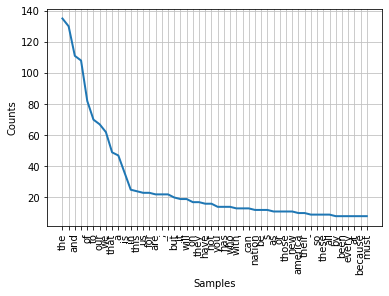

In [15]:
%matplotlib inline
fd_obama_words.plot(50)

Find out how many times the words ``peace`` and ``america`` were used in the speech:

In [16]:
print('peace: {}'.format(fd_obama_words['peace']))
print('america: {}'.format(fd_obama_words['america']))

peace: 4
america: 10


### Exercise 3

Write a function ``mostFreq`` that given a name of the inaugural speech estimates the top ``k`` (default 50) most frequent words used. 

In [19]:
def mostFreq(doc_name, k=50):
    '''
    type doc_name: string
    param doc_name: Inaugural speech name
    type k: int (default 50)
    param k: number of most common elements to return
    rtype: list of tuples
    return: list of (word, frequency) pairs
    '''
    doc_words = inaugural.words(doc_name)
    # Construct a frequency distribution over the lowercased words in the document
    fd_doc_words = FreqDist(w.lower() for w in doc_words)
    # Find the top x most frequently used words in the document
    top_words = fd_doc_words.most_common(50)
    # Return the top x most frequently used words
    print(len(top_words))
    return top_words

Use this function to estimate the list of top 50 most frequent words of Barack Obama’s 2009 speech and
George Washington’s 1789 speech. 

What can knowing word frequencies tell us about different speeches at different
times in history?

In [20]:
print("Top 50 words for Obama's 2009 speech: \n {}".format(mostFreq('2009-Obama.txt')))
print("Top 50 words for Washington's 1789 speech: \n {}".format(mostFreq('1789-Washington.txt')))

50
Top 50 words for Obama's 2009 speech: 
 [('the', 135), (',', 130), ('and', 111), ('.', 108), ('of', 82), ('to', 70), ('our', 67), ('we', 62), ('that', 49), ('a', 47), ('is', 36), ('in', 25), ('this', 24), ('us', 23), ('for', 23), ('are', 22), (';', 22), ('--', 22), ('but', 20), ('it', 19), ('will', 19), ('on', 17), ('they', 17), ('have', 16), ('not', 16), ('you', 14), ('has', 14), ('who', 14), ('with', 13), ("'", 13), ('can', 13), ('nation', 12), ('be', 12), ('s', 12), ('as', 11), ('or', 11), ('those', 11), ('new', 11), ('america', 10), ('their', 10), ('-', 9), ('so', 9), ('these', 9), ('all', 9), ('by', 8), ('been', 8), ('every', 8), ('at', 8), ('because', 8), ('must', 8)]
50
Top 50 words for Washington's 1789 speech: 
 [('the', 116), ('of', 71), (',', 70), ('and', 48), ('to', 48), ('which', 36), ('in', 31), ('i', 23), ('be', 23), ('.', 22), ('my', 22), ('by', 20), ('that', 18), ('with', 17), ('on', 15), ('a', 14), ('as', 14), ('have', 12), ('for', 12), ('it', 11), ('an', 10), ('th

## Language Models

A statistical language model assigns a probability to a sequence of words, using a probability distribution. Language models have many applications in Natural Language Processing. For example, in speech recognition, they may be used to predict the next word that a speaker will utter. In machine translation, a language model may be used to score multiple candidate translations of an input sentence to find the most fluent/natural translation from the set of candidates.

In this course, to build language models we will use ``nltk_models`` package that you extracted together with this lab. It contains two classes:

- ``NgramModel``: word-level ngram builder, given the desired probability estimator
- ``LgramModel``: char-level ngram builder, given the desired probability estimator

Documentation for this package can be found [here](https://tardis.ed.ac.uk/~fox/entries/nltk-model.html).

Each of these classes has the following initialization:

```python
    def __init__(self, 
                 n,                    # Order of the Language model:1=unigram; 2=bigram; 3=trigram, etc.
                 train,                # Training data (list)
                 pad_left=False,       # Perform left padding
                 pad_right=False,      # Perform right padding
                 estimator=None,       # Probability distribution estimator (may or may not be smoothed)
                 *estimator_args,      # Optional arguments for estimator
                 **estimator_kwargs): 
```
To import the classes execute the cell below

In [21]:
try:
    from nltk_model import *  # See the README inside the nltk_model folder for more information
except ImportError:
    from .nltk_model import * # Compatibility depending on how this script was run

## Exercise 4
Create a function ``estimateLM`` that estimates a simple a language model using particular document of the Gutenberg corpus.

In [120]:
from nltk.corpus import gutenberg
nltk.download('gutenberg')

[nltk_data] Downloading package gutenberg to
[nltk_data]     /Users/athiyadeviyani/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


True

In [121]:
def estimateLM(doc_name, n):
    '''
    :type doc_name: string
    :param doc_name : name of the document in gutenberg corpus.
    :type n: int
    :param n: order of the ngram to be estimated.
    :rtype: NgramModel:
    :return: language model, estimated by nltk.WittenBellProbDist estimator (default)
    '''
    # Construct a list of lowercase words from the document
    words = [w.lower() for w in gutenberg.words(doc_name)]
    # print(words)
    #lm = NgramModel(<order>,<training_data>)
    lm = NgramModel(n, words)
    
    return lm

Test your function by creating a language model for a novel Sense and Sensibility by Jane Austen

In [109]:
lm = estimateLM('austen-sense.txt', 2)
lm

<NgramModel with 141575 2-grams>

### Computing Probabilities

Using the language model, we can work out the probability of a word given its context. In the case of the bigram language model build in Exercise 4, we can use a ``prob`` method of ``NgramModel`` which takes the following arguments:

- ``word``: word to which the probability (score) you want to estimate
- ``context``: a list of words that occurred before, required for ngram estimation. In the case of the bigram context is a list containing just the previous word.

### Exercise 5

Using the bigram language model build in Exercise 4, compute the following probabilities:

1. ``reason`` followed by ``for``
2. ``the`` followed by ``end``
3. ``end`` followed by ``the``

In [111]:
print("Probability of 'reason' followed by 'for': {:.10f}".format(lm.prob(word='for', context=['reason'])))
print("Probability of 'the' followed by 'end': {:.10f}".format(lm.prob(word='end', context=['the'])))
print("Probability of 'end' followed by 'the': {:.10f}".format(lm.prob(word='the', context=['end'])))

Probability of 'reason' followed by 'for': 0.1132075472
Probability of 'the' followed by 'end': 0.0058465286
Probability of 'end' followed by 'the': 0.0000000000


## Going Further

### Smoothing

Try using an estimator which does do smoothing, and see what happens to all three of the bigram probabilities. Try `help(NgramModel)` for help with the operation of this class and how to supply estimators.

### Padding

So far you’ve treated the data as a flat list of ‘words’, which doesn’t fully address the place of words within sentences. Using `gutenberg.sents(...)` explore the impact of the `pad left` and `pad right` argument to `NgramModel` by further editing `estimateLM`.

In [112]:
print(lm.prob(word='The', context=['<s>']))
print(lm.prob(word='the', context=['<s>']))
print(lm.prob(word='End', context=['<s/>']))
print(lm.prob(word='end', context=['<s/>']))
print(lm.prob(word='.', context=['<s/>']))

0.0
0.02899502740577499
0.0
0.00038848392382889756
0.02807679267672487


### Cost vs. probabilities

Redo the previous two sub-sections using *costs* instead of probabilities.

In [117]:
print("Cost of 'reason' followed by 'for': {:.10f}".format(lm.logprob(word='for', context=['reason'])))
print("Cost of 'the' followed by 'end': {:.10f}".format(lm.logprob(word='end', context=['the'])))
# print("Cost of 'end' followed by 'the': {:.10f}".format(lm.logprob(word='the', context=['end'])))

Cost of 'reason' followed by 'for': 3.1429579538
Cost of 'the' followed by 'end': 7.4182040059


In [119]:
# print(lm.logprob(word='The', context=['<s>']))
print(lm.logprob(word='the', context=['<s>']))
# print(lm.logprob(word='End', context=['<s/>']))
print(lm.logprob(word='end', context=['<s/>']))
print(lm.logprob(word='.', context=['<s/>']))

5.10805068788459
11.329857481025098
5.154478049490677
